## Import needed libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

## Load Dataset

In [78]:
df = pd.read_csv("/home/dmin/code/loic06/Forecasting-Gold-Price/raw_data/FINAL_USO.csv",sep=",")

## Take a quick view on our data

In [79]:
pd.set_option('display.max_columns',None)
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
5,2011-12-22,156.350006,156.800003,155.330002,156.039993,156.039993,98

In [80]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [81]:
df.shape

(1718, 81)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

## Handling date
- Convering Date to datetime format
- Setting Date as our Dataset index

In [74]:
df["Date"]=pd.to_datetime(df["Date"])

In [75]:
df.set_index('Date', inplace=True)

In [76]:
min(df.index), max(df.index)

(Timestamp('2011-12-15 00:00:00'), Timestamp('2018-12-31 00:00:00'))

## Cheking correlation
#### Checking top 25 correlated features with out target feature 'Close'

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
Name: Close, dtype: float64


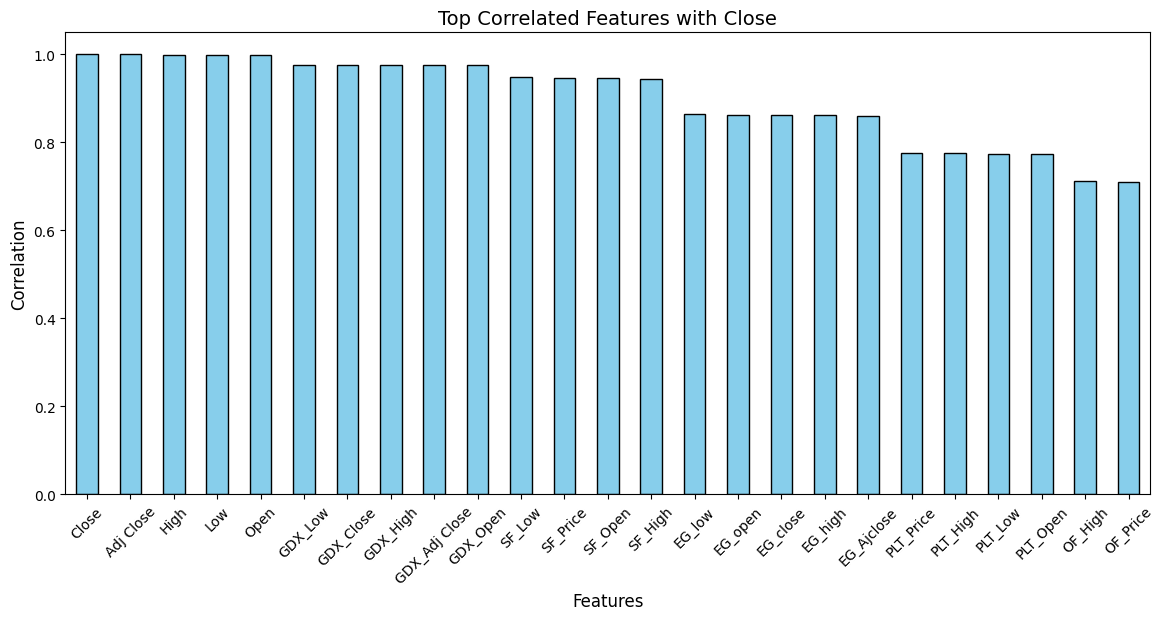

In [9]:
corr_matrix = df.corr()
top_corr = corr_matrix["Close"].sort_values(ascending=False).head(25)
print(top_corr)

plt.figure(figsize=(14,6))
top_corr.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top Correlated Features with Close", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Viewing the decomposition of our data

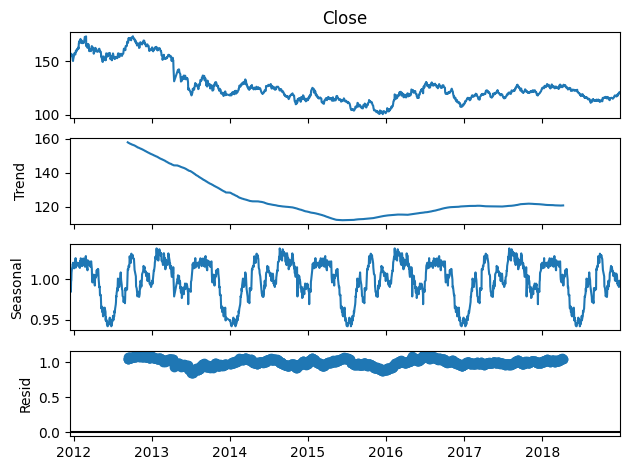

In [10]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

## Checking VIF (variance inflation factor) 
#### Checking VIF (variance inflation factor) to see if there is collinearity and handling it if needed

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = df.drop(columns=["Close"]).select_dtypes(include=["number"])
X = add_constant(features)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print(vif_data)

/home/dmin/.pyenv/versions/3.10.6/envs/Forecasting-Gold-Price/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0           const  1.276832e+05
1            Open  4.437524e+03
2            High  5.933256e+03
3             Low  4.746061e+03
4       Adj Close  5.090818e+03
..            ...           ...
75       USO_High  1.906726e+04
76        USO_Low  2.099040e+04
77      USO_Close           inf
78  USO_Adj Close           inf
79     USO_Volume  4.165988e+00

[80 rows x 2 columns]


## Cheking our date sorting
#### Cheking if our dataset is sorted right and viewing our dataset date Frequency, it can be :
- 'D' → daily
- 'B' → business daily (weekdays only)
- 'M' → month-end
- 'MS' → month-start
- None → pandas couldn’t detect a regular frequency

In [12]:
print(df.index.is_monotonic_increasing)  # should be True
print(df.index.freq)         # should be True

True
None


## Setting our frequency as 'D' - Daily

In [13]:
df = df.asfreq('D')

In [14]:
print(df.index.is_monotonic_increasing)  # should be True
print(df.index.freq)

True
<Day>


In [15]:
df.isnull().sum()

Open             856
High             856
Low              856
Close            856
Adj Close        856
                ... 
USO_High         856
USO_Low          856
USO_Close        856
USO_Adj Close    856
USO_Volume       856
Length: 80, dtype: int64

## Cheking nulls
- An odd null pattern was noticed in gold price tracking

In [16]:
pd.set_option('display.max_rows',10)
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900.0,123.029999,123.199997,121.989998,122.180000,105.441238,199109200.0,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000.0,74.550003,76.150002,72.150002,72.900002,70.431755,787900.0,1.3018,1.2982,1.3051,1.2957,1.0,105.09,104.88,106.50,104.88,14330.0,1.0,93.42,94.91,96.00,93.33,0.0,53604.0,54248.0,54248.0,52316.0,119440.0,1.0,1.911,1.911,1.911,1.911,1.0,1414.65,1420.30,1423.35,1376.85,0.0,618.85,614.70,615.00,614.6,1.0,1425.0,80.341,80.565,80.630,80.130,22850.0,0.0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600.0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700.0
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300.0,122.230003,122.949997,121.300003,121.589996,105.597549,220481400.0,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000.0,73.599998,75.099998,73.349998,74.900002,72.364037,896600.0,1.3035,1.3020,1.3087,1.2997,1.0,103.35,103.51,104.56,102.46,140080.0,0.0,93.79,93.43,94.80,92.53,1.0,53458.0,53650.0,54030.0,52890.0,65390.0,0.0,1.851,1.851,1.851,1.851,0.0,1420.25,1414.75,1431.75,1400.70,1.0,623.65,622.60,623.45,622.3,1.0,1400.0,80.249,80.175,80.395,79.935,13150.0,0.0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400.0,36.180000,36.500000,35.730000,36.270000,36.270000,12578800.0
2011-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200.0,122.059998,122.320000,120.029999,120.290001,104.468536,183903000.0,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000.0,69.099998,69.800003,64.199997,64.699997,62.509384,2096700.0,1.2995,1.3043,1.3044,1.2981,0.0,103.64,103.63,104.57,102.37,147880.0,1.0,94.09,93.77,94.43,92.55,1.0,52961.0,53400.0,53400.0,52544.0,67280.0,0.0,1.810,1.810,1.810,1.810,0.0,1411.10,1422.65,1427.60,1404.60,0.0,608.80,626.00,630.00,608.6,0.0,1400.0,80.207,80.300,80.470,80.125,970.0,0.0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200.0,36.389999,36.450001,35.930000,36.200001,36.200001,7418200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400.0,242.570007,248.289993,238.960007,248.070007,248.070007,186267300.0,22629.06055,23138.890

# Missing prices
we notice that most missing prices days are sat and sun

**Weekend missing values aren’t “real” missing data → they just don’t exist because markets don’t trade.**

Text(0.5, 1.0, 'Missing Gold Prices by Day of Year (across all years)')

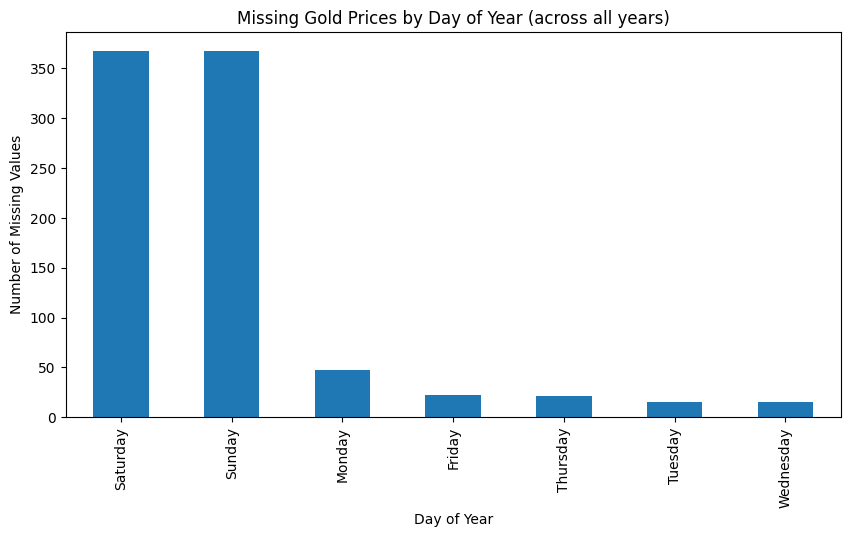

In [17]:
df.index = pd.to_datetime(df.index)  # make sure datetime

df["day"] = df.index.day_name()
nulls = df["Close"].isna().groupby(df["day"]).sum()
# Reorder to Mon–Sun (otherwise it’s alphabetical)
# weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# nulls = nulls.reindex(weekday_order)

top10=nulls.nlargest(10)
plt.figure(figsize=(10,5))
top10.plot(kind="bar")
plt.xlabel('Day of Year')
plt.ylabel('Number of Missing Values')
plt.title('Missing Gold Prices by Day of Year (across all years)')


In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900.0,123.029999,123.199997,121.989998,122.180000,105.441238,199109200.0,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000.0,74.550003,76.150002,72.150002,72.900002,70.431755,787900.0,1.3018,1.2982,1.3051,1.2957,1.0,105.09,104.88,106.50,104.88,14330.0,1.0,93.42,94.91,96.00,93.33,0.0,53604.0,54248.0,54248.0,52316.0,119440.0,1.0,1.911,1.911,1.911,1.911,1.0,1414.65,1420.30,1423.35,1376.85,0.0,618.85,614.7,615.00,614.6,1.0,1425.0,80.341,80.565,80.630,80.130,22850.0,0.0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600.0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700.0,Thursday
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300.0,122.230003,122.949997,121.300003,121.589996,105.597549,220481400.0,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000.0,73.599998,75.099998,73.349998,74.900002,72.364037,896600.0,1.3035,1.3020,1.3087,1.2997,1.0,103.35,103.51,104.56,102.46,140080.0,0.0,93.79,93.43,94.80,92.53,1.0,53458.0,53650.0,54030.0,52890.0,65390.0,0.0,1.851,1.851,1.851,1.851,0.0,1420.25,1414.75,1431.75,1400.70,1.0,623.65,622.6,623.45,622.3,1.0,1400.0,80.249,80.175,80.395,79.935,13150.0,0.0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400.0,36.180000,36.500000,35.730000,36.270000,36.270000,12578800.0,Friday
2011-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
2011-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200.0,122.059998,122.320000,120.029999,120.290001,104.468536,183903000.0,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000.0,69.099998,69.800003,64.199997,64.699997,62.509384,2096700.0,1.2995,1.3043,1.3044,1.2981,0.0,103.64,103.63,104.57,102.37,147880.0,1.0,94.09,93.77,94.43,92.55,1.0,52961.0,53400.0,53400.0,52544.0,67280.0,0.0,1.810,1.810,1.810,1.810,0.0,1411.10,1422.65,1427.60,1404.60,0.0,608.80,626.0,630.00,608.6,0.0,1400.0,80.207,80.300,80.470,80.125,970.0,0.0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200.0,36.389999,36.450001,35.930000,36.200001,36.200001,7418200.0,Monday


## Drop Day name

In [19]:
df = df.drop('day',axis=1)

## Handle nulls
- drop sat-sun (weeknds) and handle the rest

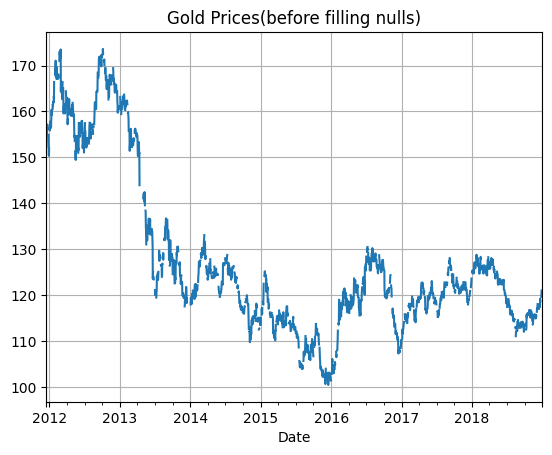

In [20]:
df['Close'].plot(title='Gold Prices(before filling nulls)')
plt.grid(True)


## Dropping days
- since we found out that our data is in business days, we dropped sat / sun and setted it to 'B' frequency

In [21]:
df = df[df.index.dayofweek < 5]
df = df.asfreq('B')
#fill nulls
#fill close coln only
df["Close"] = df["Close"].interpolate(method="linear")

In [22]:
df["Close"].isna().sum()

0

## Viewing gold prices change over time

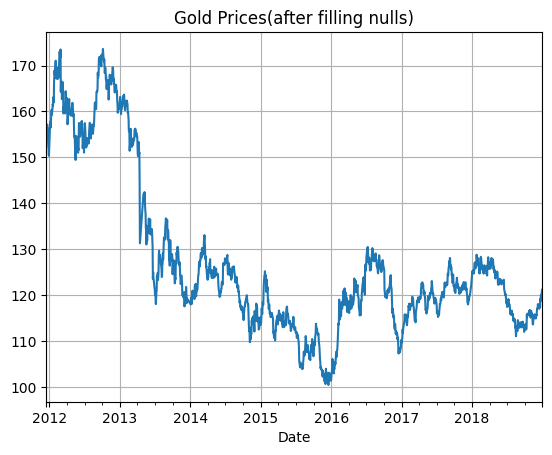

In [23]:
df['Close'].plot(title='Gold Prices(after filling nulls)')
plt.grid(True)

# Checking stationarity
Check for rolling mean and variance visually also make things sure by using Aug Dickey Fuller test

Text(0.5, 1.0, 'Rolling Mean & Variance')

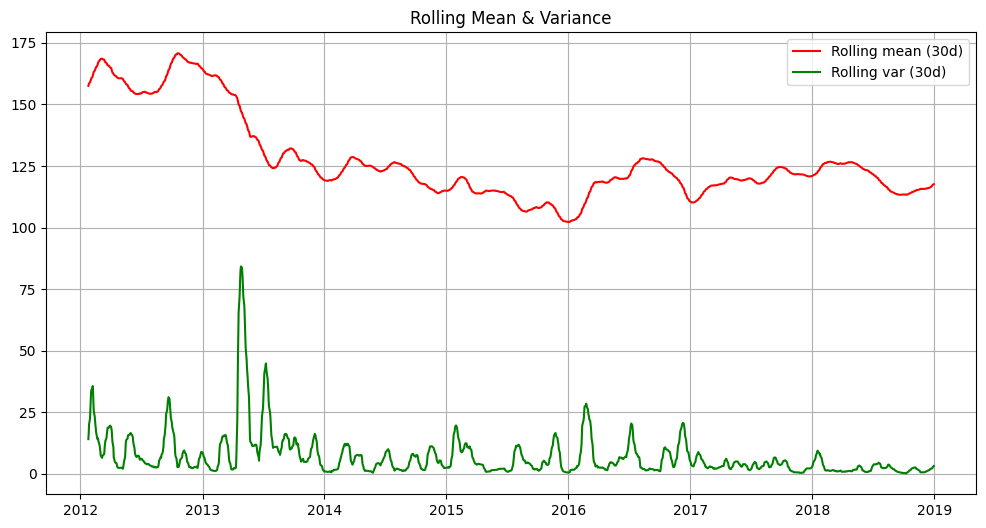

In [24]:
from statsmodels.tsa.stattools import adfuller

rolling_mean = df["Close"].rolling(window=30).mean()
rolling_variance = df["Close"].rolling(window=30).var()
plt.figure(figsize=(12,6))
plt.plot(rolling_mean,color="red",label="Rolling mean (30d)")
plt.plot(rolling_variance,color="green",label="Rolling var (30d)")
plt.legend()
plt.grid(True)
plt.title("Rolling Mean & Variance")


## Ad-Fuller test
- Strong indication that data is non-stationary

In [25]:
result = adfuller(df["Close"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -1.7594936607855212
p-value: 0.40074918424407907
Critical Values: {'1%': -3.4339147584448884, '5%': -2.863114641649469, '10%': -2.5676082847705883}


# Making our series stationary 
- We might not need our data to be stationary but we are setting an extra column for that incase we needed it

In [26]:
df['close_diff1'] = df["Close"].diff().dropna()

# Testing ADF Again
- Small p-val
- ADF STAT < 5% crit val(-2.862) 
- Stats indicate that there is no stationarity now

In [27]:
result = adfuller(df["close_diff1"].dropna()) #drop first value it has na
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -42.63242124934147
p-value: 0.0
Critical Values: {'1%': -3.4339167027591952, '5%': -2.8631154999882167, '10%': -2.5676087418063327}


## Plotting post stationarity remvoal

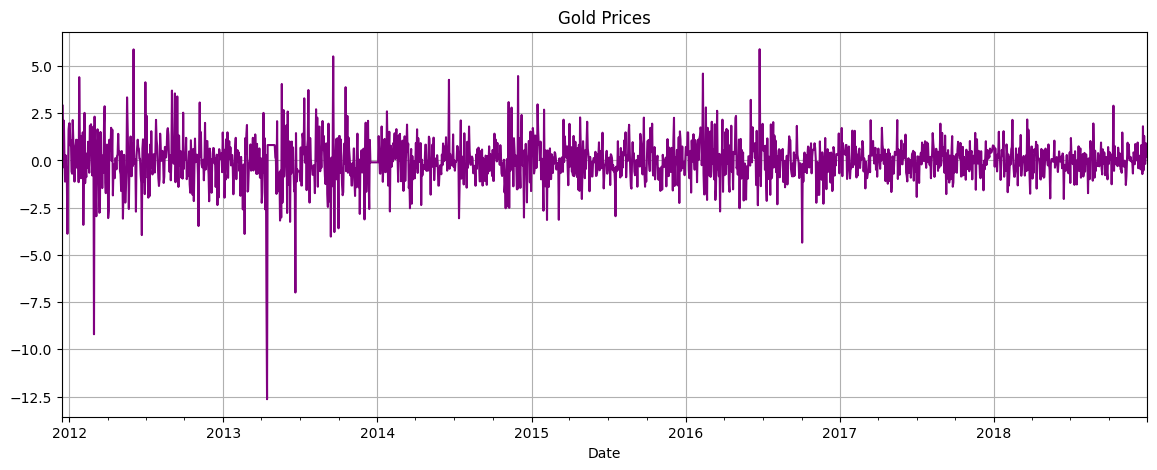

In [28]:
plt.figure(figsize=(14,5))
df['close_diff1'].plot(title='Gold Prices',color='purple')
plt.grid(True)

# Simple exponential smooting
since our data is stationary we can use Holt/Holt-Winters, Simple Ex Smoothing, ARIMA, etc

Why we use it

- Smooths noisy data → reduces random fluctuations.

- Responsive to recent changes → better short-term forecast than a simple moving average.

- No need for stationary series (SES assumes roughly constant level, Holt can handle trend).

- Easy to implement and fast → good for real-time forecasting.

In [29]:
#Split
train_size=int(len(df)*0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

/home/dmin/.pyenv/versions/3.10.6/envs/Forecasting-Gold-Price/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


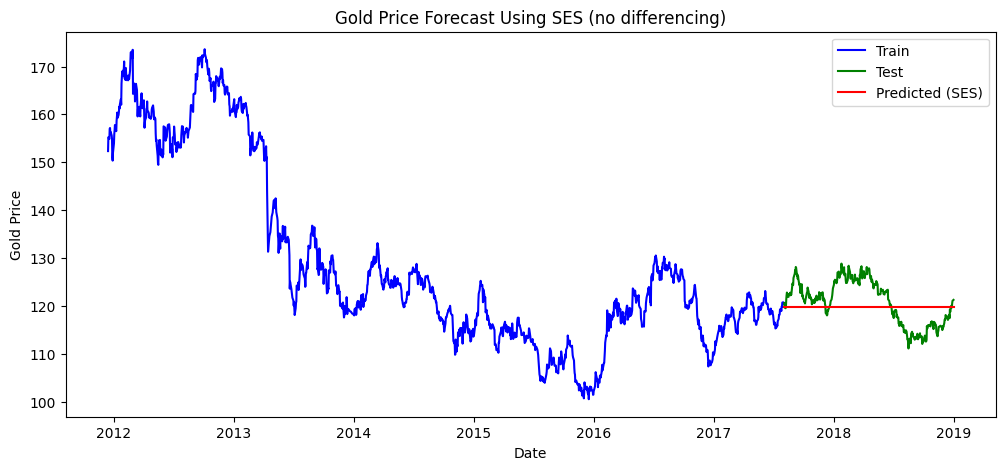

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit SES directly on training Close prices
model = SimpleExpSmoothing(train["Close"]).fit(
    smoothing_level=0.2,
    optimized=True
)

# Forecast the same length as the test set
forecast = model.forecast(len(test))

# Plot original data and forecast
plt.figure(figsize=(12,5))
plt.plot(train.index, train["Close"], label="Train", color="blue")
plt.plot(test.index, test["Close"], label="Test", color="green")
plt.plot(test.index, forecast, label="Predicted (SES)", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Forecast Using SES (no differencing)")
plt.show()


## Converting 'Close' to Pandas series

In [31]:
close_series = df['Close']

close_diff1 = close_series.diff().dropna()

## Plotting ACF and PACF plots to determing best p,q parameters for ARIMA
found out that 0,0 are the best params


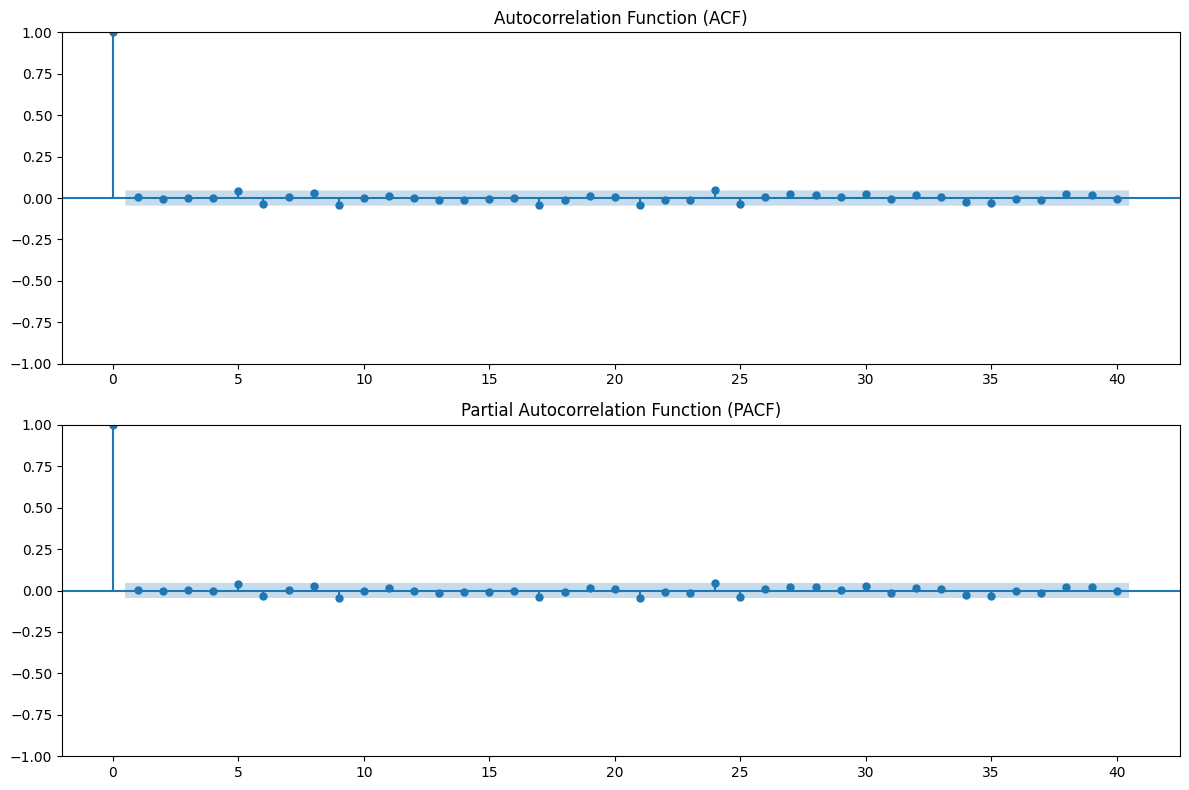

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2)=plt.subplots(2,1, figsize=(12,8))

plot_acf(close_diff1,ax=ax1,lags=40)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(close_diff1,ax=ax2,lags=40)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [33]:
split_ratio=0.8
split_index = int(split_ratio*len(close_series))
train_data = close_series[:split_index]
test_data = close_series[split_index:]

Text(0.5, 1.0, 'Actual vs Forecasted Close Prices')

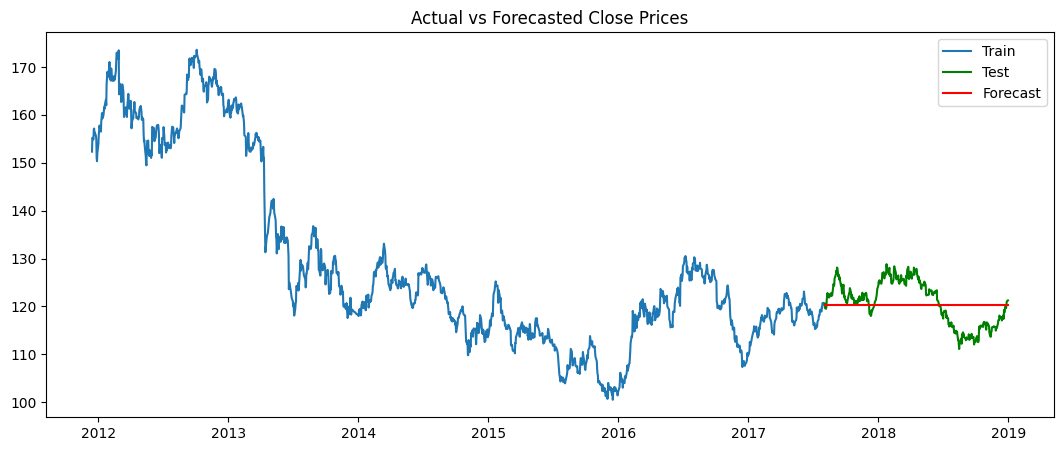

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = ARIMA(train_data,order=(0,1,0))

fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test_data))

plt.figure(figsize=(13,5))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='Test',color='green')
plt.plot(test_data.index,forecast,label='Forecast',color='red')
plt.legend()
plt.title('Actual vs Forecasted Close Prices')


## Evaluate ARIMA (Auto Regressive Moving Average)
- RMSE : 4.63, not bad but good as a base model and open for improvements

In [35]:

rmse = np.sqrt(mean_squared_error(test_data,forecast))

print(f"Baseline ARIMA(0,1,0) RMSE: {rmse}")

Baseline ARIMA(0,1,0) RMSE: 4.6319333102019


In [36]:
# df[['SP_close','DJ_close']]= df[['SP_close','DJ_close']].ffill()

new_cols=['SP_close','DJ_close','USDI_Price','GDX_Close','USO_Close','RHO_PRICE','PLD_Price','PLT_Price','USB_Price',
'SF_Price','OS_Price','OF_Price']
for col in new_cols:
   df[col]= df[col].ffill()

In [37]:
df.isna().sum()

Open             120
High             120
Low              120
Close              0
Adj Close        120
                ... 
USO_Low          120
USO_Close          0
USO_Adj Close    120
USO_Volume       120
close_diff1        1
Length: 81, dtype: int64

In [38]:
df=df.ffill()

## Creating lags & Rolling mean
- Creating Lag column ('Cost' for day-1)
- Creating rolling mean for a 7 - day window

In [39]:
df['target_close']=df['Close'].shift(-1)

In [40]:
df['rolling_mean7']=df['Close'].rolling(window=7).mean()

In [41]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,close_diff1,target_close,rolling_mean7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900.0,123.029999,123.199997,121.989998,122.180000,105.441238,199109200.0,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000.0,74.550003,76.150002,72.150002,72.900002,70.431755,787900.0,1.3018,1.2982,1.3051,1.2957,1.0,105.09,104.88,106.50,104.88,14330.0,1.0,93.42,94.91,96.00,93.33,0.0,53604.0,54248.0,54248.0,52316.0,119440.0,1.0,1.911,1.911,1.911,1.911,1.0,1414.65,1420.30,1423.35,1376.85,0.0,618.85,614.7,615.00,614.6,1.0,1425.0,80.341,80.565,80.630,80.130,22850.0,0.0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600.0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700.0,NaN,155.229996,NaN
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300.0,122.230003,122.949997,121.300003,121.589996,105.597549,220481400.0,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000.0,73.599998,75.099998,73.349998,74.900002,72.364037,896600.0,1.3035,1.3020,1.3087,1.2997,1.0,103.35,103.51,104.56,102.46,140080.0,0.0,93.79,93.43,94.80,92.53,1.0,53458.0,53650.0,54030.0,52890.0,65390.0,0.0,1.851,1.851,1.851,1.851,0.0,1420.25,1414.75,1431.75,1400.70,1.0,623.65,622.6,623.45,622.3,1.0,1400.0,80.249,80.175,80.395,79.935,13150.0,0.0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400.0,36.180000,36.500000,35.730000,36.270000,36.270000,12578800.0,2.899994,154.869995,NaN
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200.0,122.059998,122.320000,120.029999,120.290001,104.468536,183903000.0,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000.0,69.099998,69.800003,64.199997,64.699997,62.509384,2096700.0,1.2995,1.3043,1.3044,1.2981,0.0,103.64,103.63,104.57,102.37,147880.0,1.0,94.09,93.77,94.43,92.55,1.0,52961.0,53400.0,53400.0,52544.0,67280.0,0.0,1.810,1.810,1.810,1.810,0.0,1411.10,1422.65,1427.60,1404.60,0.0,608.80,626.0,630.00,608.6,0.0,1400.0,80.207,80.300,80.470,80.125,970.0,0.0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200.0,36.389999,36.450001,35.930000,36.200001,36.200001,7418200.0,-0.360001,156.979996,NaN


## Volatility calculation
#### Calculate volatility on windows 7 - 15 - 30 Days

In [42]:
returns=df['Close'].pct_change()
volatility_windows=[7,15,30]
for vol in volatility_windows:
    df[f'vol_{vol}']=returns.rolling(window=vol).std()

print(df[['vol_7', 'vol_15', 'vol_30']].head(10))

               vol_7  vol_15  vol_30
Date                                
2011-12-15       NaN     NaN     NaN
2011-12-16       NaN     NaN     NaN
2011-12-19       NaN     NaN     NaN
2011-12-20       NaN     NaN     NaN
2011-12-21       NaN     NaN     NaN
2011-12-22       NaN     NaN     NaN
2011-12-23       NaN     NaN     NaN
2011-12-26  0.009677     NaN     NaN
2011-12-27  0.006902     NaN     NaN
2011-12-28  0.011702     NaN     NaN


In [43]:
df["day_num"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year

## Calculate momentum 
#### Calculate momentum using same 7 - 15 - 30 windows

In [44]:
for mom in volatility_windows:
    df[f'momentum_{mom}'] = df['Close'].pct_change(mom)

In [45]:
print(df[['momentum_7', 'momentum_15', 'momentum_30']].head(10))

            momentum_7  momentum_15  momentum_30
Date                                            
2011-12-15         NaN          NaN          NaN
2011-12-16         NaN          NaN          NaN
2011-12-19         NaN          NaN          NaN
2011-12-20         NaN          NaN          NaN
2011-12-21         NaN          NaN          NaN
2011-12-22         NaN          NaN          NaN
2011-12-23         NaN          NaN          NaN
2011-12-26    0.021532          NaN          NaN
2011-12-27   -0.002061          NaN          NaN
2011-12-28   -0.024795          NaN          NaN


### Handling null values again
 - we should delete them instead of filling Nulls because that would create fake / inaccurate data

In [46]:
df=df.dropna()

In [47]:
df.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
              ..
month          0
year           0
momentum_7     0
momentum_15    0
momentum_30    0
Length: 92, dtype: int64

In [55]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,close_diff1,target_close,rolling_mean7,vol_7,vol_15,vol_30,day_num,month,year,momentum_7,momentum_15,momentum_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-26,161.070007,166.550003,160.289993,167.694999,166.419998,28957700.0,131.259995,132.869995,130.750000,132.559998,115.124702,198613200.0,12673.62988,12778.25977,12580.12012,12758.84961,12758.84961,135430000.0,66.150002,70.599998,65.250000,70.300003,67.919785,1366800.0,1.3110,1.3028,1.3121,1.2929,1.0,109.81,110.22,110.89,108.91,234590.0,0.0,99.75,99.22,100.42,97.55,1.0,56411.0,55555.0,56585.0,54671.0,93780.0,1.0,2.002,2.002,2.002,2.002,0.0,1583.65,1550.15,1586.35,1543.05,1.0,694.2,682.1,696.2,670.9,1.0,1400.0,79.717,79.965,80.505,79.515,36150.0,0.0,51.580002,55.410000,51.270000,55.230000,52.488239,26995600.0,37.820000,38.580002,37.490002,38.349998,38.349998,14198600.0,1.275002,168.970001,163.453573,0.010756,0.008796,0.009892,26,1,2012,0.044829,0.062841,0.100867
2012-01-27,167.440002,169.000000,167.410004,168.970001,168.970001,13030100.0,131.240005,132.050003,131.149994,131.820007,114.482040,135259100.0,12733.95020,12733.95020,12630.71973,12660.45996,12660.45996,164410000.0,71.150002,76.050003,70.250000,75.250000,73.167557,993200.0,1.3226,1.3106,1.3230,1.3077,1.0,111.46,111.00,111.99,110.49,218690.0,1.0,99.78,99.95,100.64,99.14,0.0,57165.0,56573.0,57396.0,56573.0,66450.0,1.0,1.891,1.891,1.891,1.891,0.0,1624.60,1609.85,1627.25,1603.65,1.0,690.6,691.0,694.5,681.5,0.0,1425.0,79.011,79.620,79.630,78.890,28700.0,0.0,55.799999,57.369999,55.720001,57.139999,54.303421,14823200.0,38.279999,38.669998,38.090000,38.299999,38.299999,7246800.0,1.275002,168.029999,164.506429,0.010765,0.008562,0.009475,27,1,2012,0.045606,0.074873,0.088514
2012-01-30,168.190002,168.539993,167.740005,168.029999,168.029999,8438000.0,130.509995,131.440002,130.059998,131.369995,114.091202,147311800.0,12659.16992,12659.32031,12529.41016,12653.71973,12653.71973,130430000.0,73.800003,75.150002,72.900002,74.150002,72.098000,695100.0,1.3127,1.3226,1.3232,1.3076,0.0,110.75,111.50,111.78,110.25,163790.0,0.0,98.95,100.01,100.06,98.44,0.0,56992.0,57090.0,57145.0,56425.0,59920.0,0.0,1.846,1.846,1.846,1.846,0.0,1612.80,1624.20,1626.25,1601.75,0.0,689.3,691.4,691.7,679.8,0.0,1450.0,79.302,78.960,79.570,78.960,22360.0,1.0,56.400002,56.910000,55.799999,56.459999,53.657177,8660600.0,37.930000,38.279999,37.830002,38.009998,38.009998,5349600.0,-0.940002,169.309998,165.479286,0.011260,0.008652,0.009554,30,1,2012,0.042240,0.073674,0.084975
2012-01-31,169.770004,169.860001,167.720001,169.309998,169.309998,11192500.0,132.020004,132.179993,130.679993,131.320007,114.047813,157212000.0,12654.78027,12720.09961,12567.33008,12632.91016,12632.91016,168070000.0,75.949997,76.349998,73.900002,75.550003,73.459251,735400.0,1.3079,1.3135,1.3213,1.3041,0.0,110.98,110.98,113.90,110.50,238210.0,1.0,98.28,98.89,101.31,97.88,0.0,56422.0,57055.0,57490.0,56112.0,74590.0,0.0,1.795,1.795,1.795,1.795,0.0,1593.75,1612.90,1632.80,1583.20,0.0,685.2,689.2,697.0,684.5,0.0,1475.0,79.417,79.165,79.630,78.855,24950.0,1.0,57.520000,57.709999,55.750000,56.459999,53.657177,14442300.0,38.830002,38.840000,37.610001,37.820000,37.820000,9687300.0,1.279999,169.559998,166.513571,0.011270,0.008344,0.009380,31,1,20

### Define Train/Target and split !

In [59]:
# 'X' is every column EXCEPT 'Close'
X = df.drop(['target_close','EU_Trend','OF_Trend','OS_Trend','SF_Trend','USB_Trend','PLT_Trend','PLD_Trend','USDI_Trend'], axis=1)

# 'y' is ONLY the 'Close' column
y = df['target_close']

In [65]:
X

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OS_Price,OS_Open,OS_High,OS_Low,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,USB_Price,USB_Open,USB_High,USB_Low,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLD_Price,PLD_Open,PLD_High,PLD_Low,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,close_diff1,rolling_mean7,vol_7,vol_15,vol_30,day_num,month,year,momentum_7,momentum_15,momentum_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-26,161.070007,166.550003,160.289993,167.694999,166.419998,28957700.0,131.259995,132.869995,130.750000,132.559998,115.124702,198613200.0,12673.62988,12778.25977,12580.12012,12758.84961,12758.84961,135430000.0,66.150002,70.599998,65.250000,70.300003,67.919785,1366800.0,1.3110,1.3028,1.3121,1.2929,109.81,110.22,110.89,108.91,234590.0,99.75,99.22,100.42,97.55,56411.0,55555.0,56585.0,54671.0,93780.0,2.002,2.002,2.002,2.002,1583.65,1550.15,1586.35,1543.05,694.2,682.10,696.2,670.9,1400.0,79.717,79.965,80.505,79.515,36150.0,51.580002,55.410000,51.270000,55.230000,52.488239,26995600.0,37.820000,38.580002,37.490002,38.349998,38.349998,14198600.0,1.275002,163.453573,0.010756,0.008796,0.009892,26,1,2012,0.044829,0.062841,0.100867
2012-01-27,167.440002,169.000000,167.410004,168.970001,168.970001,13030100.0,131.240005,132.050003,131.149994,131.820007,114.482040,135259100.0,12733.95020,12733.95020,12630.71973,12660.45996,12660.45996,164410000.0,71.150002,76.050003,70.250000,75.250000,73.167557,993200.0,1.3226,1.3106,1.3230,1.3077,111.46,111.00,111.99,110.49,218690.0,99.78,99.95,100.64,99.14,57165.0,56573.0,57396.0,56573.0,66450.0,1.891,1.891,1.891,1.891,1624.60,1609.85,1627.25,1603.65,690.6,691.00,694.5,681.5,1425.0,79.011,79.620,79.630,78.890,28700.0,55.799999,57.369999,55.720001,57.139999,54.303421,14823200.0,38.279999,38.669998,38.090000,38.299999,38.299999,7246800.0,1.275002,164.506429,0.010765,0.008562,0.009475,27,1,2012,0.045606,0.074873,0.088514
2012-01-30,168.190002,168.539993,167.740005,168.029999,168.029999,8438000.0,130.509995,131.440002,130.059998,131.369995,114.091202,147311800.0,12659.16992,12659.32031,12529.41016,12653.71973,12653.71973,130430000.0,73.800003,75.150002,72.900002,74.150002,72.098000,695100.0,1.3127,1.3226,1.3232,1.3076,110.75,111.50,111.78,110.25,163790.0,98.95,100.01,100.06,98.44,56992.0,57090.0,57145.0,56425.0,59920.0,1.846,1.846,1.846,1.846,1612.80,1624.20,1626.25,1601.75,689.3,691.40,691.7,679.8,1450.0,79.302,78.960,79.570,78.960,22360.0,56.400002,56.910000,55.799999,56.459999,53.657177,8660600.0,37.930000,38.279999,37.830002,38.009998,38.009998,5349600.0,-0.940002,165.479286,0.011260,0.008652,0.009554,30,1,2012,0.042240,0.073674,0.084975
2012-01-31,169.770004,169.860001,167.720001,169.309998,169.309998,11192500.0,132.020004,132.179993,130.679993,131.320007,114.047813,157212000.0,12654.78027,12720.09961,12567.33008,12632.91016,12632.91016,168070000.0,75.949997,76.349998,73.900002,75.550003,73.459251,735400.0,1.3079,1.3135,1.3213,1.3041,110.98,110.98,113.90,110.50,238210.0,98.28,98.89,101.31,97.88,56422.0,57055.0,57490.0,56112.0,74590.0,1.795,1.795,1.795,1.795,1593.75,1612.90,1632.80,1583.20,685.2,689.20,697.0,684.5,1475.0,79.417,79.165,79.630,78.855,24950.0,57.520000,57.709999,55.750000,56.459999,53.657177,14442300.0,38.830002,38.840000,37.610001,37.820000,37.820000,9687300.0,1.279999,166.513571,0.011270,0.008344,0.009380,31,1,2012,0.044672,0.067259,0.078545
2012-02-01,169.750000,170.179993,169.080002,169.559998,169.559998,7734200.0,132.289993,133.139999,132.130005,132.470001,115.046532,166234500.0,12632.75977,12784.62012,12632.75977,12716.45996,12716.45996,143500000.0,76.449997,76.750000,75

In [60]:
split_ratio = 0.8
split_index = int(split_ratio * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

## Train XGboost model
- 0.12 RMSE found, Pretty good number ! 

In [61]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
# These are some common starting parameters:
# n_estimators: The number of trees to build.
# max_depth: The maximum depth of each tree.
# learning_rate: How much to shrink the contribution of each new tree.
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.01,
    early_stopping_rounds=10 # Stops training if performance doesn't improve
)

# 2. Train the model
# Use eval_set to monitor performance on the test set for early stopping

val_size = int(0.1 * len(X_train))
X_train_sub, X_val = X_train[:-val_size], X_train[-val_size:]
y_train_sub, y_val = y_train[:-val_size], y_train[-val_size:]

model.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_train,y_train),(X_val, y_val)],
    verbose=True
)



# model.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     verbose=False # Set true to see training progress
# )

#Make predictions on the test set
predictions = model.predict(X_test)

#Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"XGBoost RMSE: {rmse}")

[0]	validation_0-rmse:18.64142	validation_1-rmse:11.03520
[1]	validation_0-rmse:18.45819	validation_1-rmse:10.92408
[2]	validation_0-rmse:18.27676	validation_1-rmse:10.81392
[3]	validation_0-rmse:18.09723	validation_1-rmse:10.70696
[4]	validation_0-rmse:17.91941	validation_1-rmse:10.59914
[5]	validation_0-rmse:17.74340	validation_1-rmse:10.49394
[6]	validation_0-rmse:17.56904	validation_1-rmse:10.38838
[7]	validation_0-rmse:17.39648	validation_1-rmse:10.28434
[8]	validation_0-rmse:17.22556	validation_1-rmse:10.18078
[9]	validation_0-rmse:17.05637	validation_1-rmse:10.07852
[10]	validation_0-rmse:16.88893	validation_1-rmse:9.97860
[11]	validation_0-rmse:16.72308	validation_1-rmse:9.87865
[12]	validation_0-rmse:16.55896	validation_1-rmse:9.77950
[13]	validation_0-rmse:16.39635	validation_1-rmse:9.68127
[14]	validation_0-rmse:16.23541	validation_1-rmse:9.58401
[15]	validation_0-rmse:16.07603	validation_1-rmse:9.48772
[16]	validation_0-rmse:15.91835	validation_1-rmse:9.39388
[17]	validatio

## Plotting Train VS Test VS Forecase(predict)
- As we see, the forecast (prediction) is so near to the real test data which indicate a high accuracy !

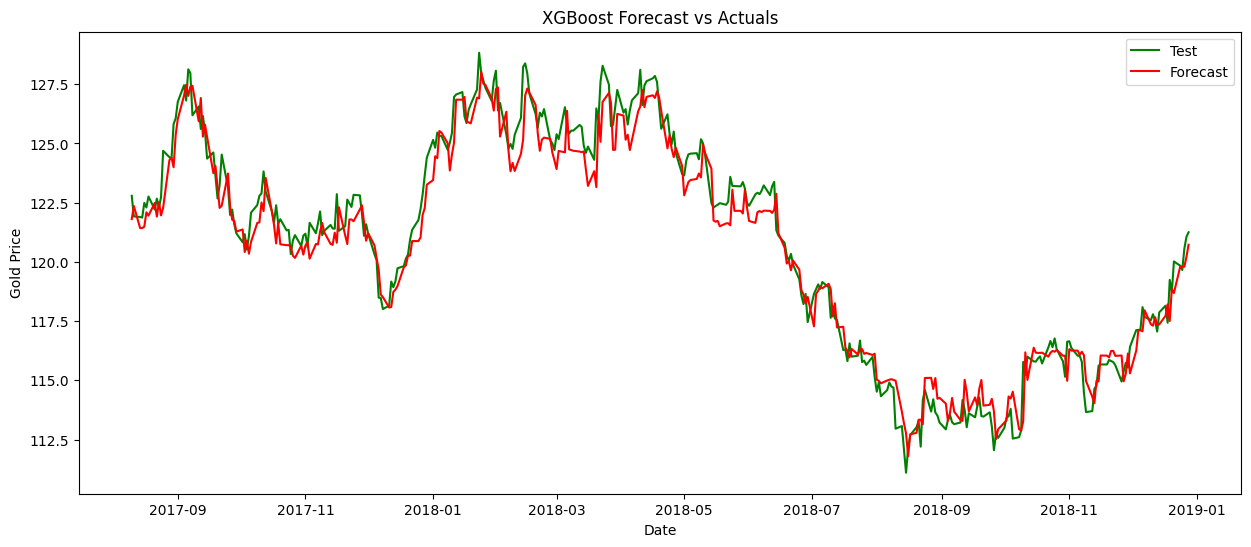

In [62]:
predictions_series = pd.Series(predictions, index=y_test.index)

# Create the plot
plt.figure(figsize=(15, 6))

# Plot the actual test data
plt.plot(y_test, label='Test', color='green')

# Plot the XGBoost predictions
plt.plot(predictions_series, label='Forecast', color='red')

# Add titles and labels for clarity
plt.title('XGBoost Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [82]:
X

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OS_Price,OS_Open,OS_High,OS_Low,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,USB_Price,USB_Open,USB_High,USB_Low,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLD_Price,PLD_Open,PLD_High,PLD_Low,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,close_diff1,rolling_mean7,vol_7,vol_15,vol_30,day_num,month,year,momentum_7,momentum_15,momentum_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-26,161.070007,166.550003,160.289993,167.694999,166.419998,28957700.0,131.259995,132.869995,130.750000,132.559998,115.124702,198613200.0,12673.62988,12778.25977,12580.12012,12758.84961,12758.84961,135430000.0,66.150002,70.599998,65.250000,70.300003,67.919785,1366800.0,1.3110,1.3028,1.3121,1.2929,109.81,110.22,110.89,108.91,234590.0,99.75,99.22,100.42,97.55,56411.0,55555.0,56585.0,54671.0,93780.0,2.002,2.002,2.002,2.002,1583.65,1550.15,1586.35,1543.05,694.2,682.10,696.2,670.9,1400.0,79.717,79.965,80.505,79.515,36150.0,51.580002,55.410000,51.270000,55.230000,52.488239,26995600.0,37.820000,38.580002,37.490002,38.349998,38.349998,14198600.0,1.275002,163.453573,0.010756,0.008796,0.009892,26,1,2012,0.044829,0.062841,0.100867
2012-01-27,167.440002,169.000000,167.410004,168.970001,168.970001,13030100.0,131.240005,132.050003,131.149994,131.820007,114.482040,135259100.0,12733.95020,12733.95020,12630.71973,12660.45996,12660.45996,164410000.0,71.150002,76.050003,70.250000,75.250000,73.167557,993200.0,1.3226,1.3106,1.3230,1.3077,111.46,111.00,111.99,110.49,218690.0,99.78,99.95,100.64,99.14,57165.0,56573.0,57396.0,56573.0,66450.0,1.891,1.891,1.891,1.891,1624.60,1609.85,1627.25,1603.65,690.6,691.00,694.5,681.5,1425.0,79.011,79.620,79.630,78.890,28700.0,55.799999,57.369999,55.720001,57.139999,54.303421,14823200.0,38.279999,38.669998,38.090000,38.299999,38.299999,7246800.0,1.275002,164.506429,0.010765,0.008562,0.009475,27,1,2012,0.045606,0.074873,0.088514
2012-01-30,168.190002,168.539993,167.740005,168.029999,168.029999,8438000.0,130.509995,131.440002,130.059998,131.369995,114.091202,147311800.0,12659.16992,12659.32031,12529.41016,12653.71973,12653.71973,130430000.0,73.800003,75.150002,72.900002,74.150002,72.098000,695100.0,1.3127,1.3226,1.3232,1.3076,110.75,111.50,111.78,110.25,163790.0,98.95,100.01,100.06,98.44,56992.0,57090.0,57145.0,56425.0,59920.0,1.846,1.846,1.846,1.846,1612.80,1624.20,1626.25,1601.75,689.3,691.40,691.7,679.8,1450.0,79.302,78.960,79.570,78.960,22360.0,56.400002,56.910000,55.799999,56.459999,53.657177,8660600.0,37.930000,38.279999,37.830002,38.009998,38.009998,5349600.0,-0.940002,165.479286,0.011260,0.008652,0.009554,30,1,2012,0.042240,0.073674,0.084975
2012-01-31,169.770004,169.860001,167.720001,169.309998,169.309998,11192500.0,132.020004,132.179993,130.679993,131.320007,114.047813,157212000.0,12654.78027,12720.09961,12567.33008,12632.91016,12632.91016,168070000.0,75.949997,76.349998,73.900002,75.550003,73.459251,735400.0,1.3079,1.3135,1.3213,1.3041,110.98,110.98,113.90,110.50,238210.0,98.28,98.89,101.31,97.88,56422.0,57055.0,57490.0,56112.0,74590.0,1.795,1.795,1.795,1.795,1593.75,1612.90,1632.80,1583.20,685.2,689.20,697.0,684.5,1475.0,79.417,79.165,79.630,78.855,24950.0,57.520000,57.709999,55.750000,56.459999,53.657177,14442300.0,38.830002,38.840000,37.610001,37.820000,37.820000,9687300.0,1.279999,166.513571,0.011270,0.008344,0.009380,31,1,2012,0.044672,0.067259,0.078545
2012-02-01,169.750000,170.179993,169.080002,169.559998,169.559998,7734200.0,132.289993,133.139999,132.130005,132.470001,115.046532,166234500.0,12632.75977,12784.62012,12632.75977,12716.45996,12716.45996,143500000.0,76.449997,76.750000,75